In [1]:
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

/home/hvyd/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Import  Visualize Process Data

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [3]:
train_x = train[["bone_length", "rotting_flesh", "hair_length", "has_soul"]]
train_y = train['type']

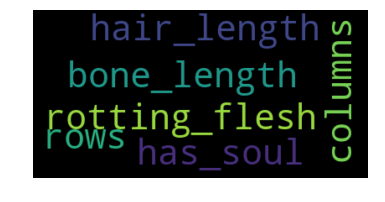

In [12]:
wordcloud = WordCloud(max_font_size=42).generate(str(train_x))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
set(train['color'])

{'black', 'blood', 'blue', 'clear', 'green', 'white'}

In [5]:
x = pd.get_dummies(train['color'])
train_features = pd.concat([train_x, x], axis=1)

In [6]:
train_features.head()

,bone_length,rotting_flesh,hair_length,has_soul,black,blood,blue,clear,green,white
0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,1,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,1,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,0


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(train_features, train_y, test_size = 0.2, random_state = 42)

### Build Score Visualize Model's

In [33]:
#train
Trncls = DecisionTreeClassifier()
Trncls.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
pred = Trncls.predict(X_test)
score = fbeta_score(np.array(Y_test), pred, beta=0.5, average='macro')
print('fbeta_score =  ',score)

fbeta_score =   0.632443805263


In [35]:
#test
test_x = pd.read_csv('data/test.csv')
test_x.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [36]:
Tstcls = DecisionTreeClassifier()

In [37]:
y = pd.get_dummies(test_x['color'])
test_columns = test_x[["bone_length", "rotting_flesh", "hair_length", "has_soul"]]
test_features = pd.concat([test_columns, y], axis=1)

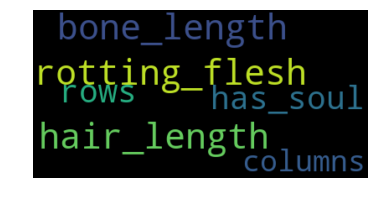

In [38]:
wordcloud = WordCloud(max_font_size=42).generate(str(train_x))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
test_features.head()

,bone_length,rotting_flesh,hair_length,has_soul,black,blood,blue,clear,green,white
0,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0
1,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1
2,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0
3,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1
4,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0


In [40]:
Tstcls.fit(train_features, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
## Prediction - is it a Ghoul, Ghost or a Goblin

In [50]:
pred_boo = Tstcls.predict(test_features)
print("Boo!!! It's a: ", pred_boo[0])

Boo!!! It's a:  Ghoul
